In [1]:
using Plots 
using DataFrames
using XLSX
using LsqFit
using LaTeXStrings

In [2]:
gr()

Plots.GRBackend()

In [3]:
e = 1.60217662e-19
k = 1.38064852e-23
T = 298.15

298.15

## Calculating Material Constant 

In [4]:
reverse = DataFrame(XLSX.readtable("Reverse saturation current and material constant.xlsx", "Sheet1"))
reverse = DataFrame(Voltage = reverse[1, 1], Current = reverse[2, 1])
reverse[!, "ln(I)"] = log.(exp(1), (reverse.Current .* 1e-3))
reverse

,Voltage,Current,ln(I)
,Any,Any,Float64
1,0.5,0.07,-9.56702
2,0.525,0.09,-9.3157
3,0.55,0.12,-9.02802
4,0.575,0.19,-8.56849
5,0.6,0.33,-8.01642
6,0.625,0.61,-7.40205
7,0.65,1.19,-6.7338
8,0.675,2.47,-6.00354
9,0.7,5.15,-5.26876


In [5]:
linear_model(x, params) = params[1] .* x .+ params[2]

fit = curve_fit(linear_model, (reverse.Voltage)[3:end], 
    (reverse."ln(I)")[3:end], [0.5, 0.5])

params = fit.param
m, c = params
Δm, Δc = standard_errors(fit)

2-element Array{Float64,1}:
 0.663801244999529
 0.4325004017489266

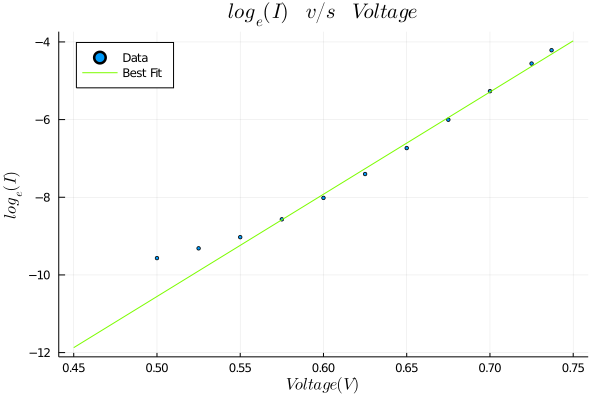

In [6]:
scatter(reverse[!, "Voltage"], reverse[!, "ln(I)"], markersize = 2,
    label = "Data")
x = LinRange(0.45, 0.75, 1000)
plot!(x, linear_model(x, params), label = "Best Fit", 
    color = "lawngreen", legend = :topleft)
title!(L"log_e(I)\quad  v/s\quad Voltage")
ylabel!(L"log_e(I)")
xlabel!(L"Voltage (V)")

In [7]:
I0 = exp(c) ##in A
I0 = I0 * 10^(9)

η = e/(m*k*T)

Δη = sqrt((Δm/m)^2)

println("Material Constant η = $η")
println("Standard Deviation = $Δη")
println("Reverse Saturation Current = $I0 nA")

Material Constant η = 1.4779972756735167
Standard Deviation = 0.025206889153581092
Reverse Saturation Current = 0.04981431756585259 nA


## Band gap energy

In [8]:
TvsV = DataFrame(XLSX.readtable("Energy band gap and Temperature coefficient.xlsx", "Sheet1"))
TvsV = DataFrame(Temperature = TvsV[1, 1], Voltage = TvsV[2, 1])

,Temperature,Voltage
,Any,Any
1,288,0.667
2,290,0.663
3,292,0.66
4,294,0.657
5,296,0.654
6,298,0.652
7,300,0.648
8,302,0.645
9,304,0.643


In [9]:
linear_model(x, params) = params[1] .* x .+ params[2]

fit = curve_fit(linear_model, TvsV.Voltage, TvsV.Temperature, [0.5, 0.5])

params = fit.param
m, c = params
Δm, Δc = standard_errors(fit)

2-element Array{Float64,1}:
 9.079442723156667
 5.747474005198746

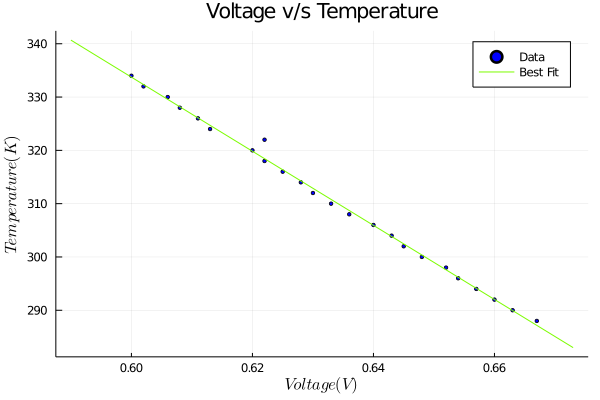

In [10]:
scatter(TvsV[!, "Voltage"], TvsV[!, "Temperature"], label = "Data", color = "blue", markersize = 2)
x = LinRange(0.59, 0.673, 1000)
plot!(x, linear_model(x, params), label = "Best Fit", color = "lawngreen")
title!("Voltage v/s Temperature")
ylabel!(L"Temperature (K)")
xlabel!(L"Voltage (V)")

In [11]:
Eg = 6.242e+18 * -(c/m)*e 
ΔEg = sqrt((Δm/m)^2 + (Δc/c)^2)

println("Band gap value = $Eg eV")
println("Standard Deviation = $ΔEg eV")

Band gap value = 1.0802105486895885 eV
Standard Deviation = 0.01513998052708136 eV


## Plotting Current v/s Voltage

In [12]:
forward = DataFrame(XLSX.readtable("Forward characteristics of junction diode.xlsx", "Sheet1"))
forward = DataFrame(Voltage = forward[1, 1], Current = forward[2, 1])

,Voltage,Current
,Any,Any
1,0.08,0
2,0.4,0.12
3,0.45,0.34
4,0.475,0.59
5,0.5,1.02
6,0.525,1.79
7,0.55,3.12
8,0.575,5.52
9,0.6,9.92


In [13]:
exp_model(x, params) = params[1] .* exp.(params[2] .* x) .+ params[3]

fit = curve_fit(exp_model, forward.Voltage, forward.Current, [0.5, 0.5, 0.5])

params = fit.param
I0, r, c = params
ΔI0, Δr, Δc = standard_errors(fit)

print(params)

[8.44561696690122e-5, 19.37044554430214, -0.19841575551424953]

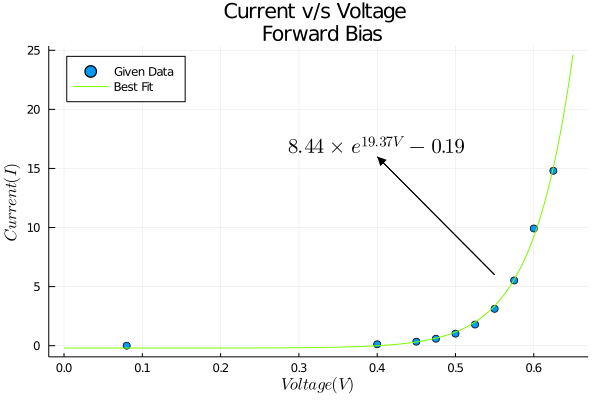

In [14]:
scatter(forward[!, "Voltage"], forward[!, "Current"] , legend = :topleft, label = "Given Data")
x = LinRange(0.0, 0.65, 1000)
plot!(x, exp_model(x, params), label = "Best Fit", color = "lawngreen", legend = :topleft)
plot!( [0.55, 0.4], [6, 16], arrow = :closed, label = "", color = :black)
title!("Current v/s Voltage \n Forward Bias")
ylabel!(L"Current (I)")
xlabel!(L"Voltage (V)")
annotate!((0.4, 17, L"8.44 \times e^{19.37 V} - 0.19"))